### Tree- Based Methods

In [4]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table
from ISLP.models import ModelSpec as MS

In [6]:
from sklearn.tree import (DecisionTreeClassifier as DTC,
                          DecisionTreeRegressor as DTR,
                          plot_tree,
                          export_text)
from sklearn.metrics import (accuracy_score,
                             log_loss)
from sklearn.ensemble import \
     (RandomForestRegressor as RF,
      GradientBoostingRegressor as GBR)
from ISLP.bart import BART


### Fitting Classification Trees

We first use classification trees to analyze the Carseats dat set. In these data, Sales is a continous variabe and so we begin by recording it as a binary variable. We use the Where() function to create a variable called High, which takes on a value of yes if the sales varaible exceeds 8 and takes on a value of no otherewise.

In [12]:
Carseats = load_data('Carseats')
High = np.where(Carseats.Sales > 8,
                "Yes",
                "No")

we now use DecisionTreeClassifier() to fit a classification tree in order to predict high using all variables but sales. To do so, We must form a model matrix as we did when fitting regression models.

In [17]:
model = MS(Carseats.columns.drop('Sales'), intercept=False)
D = model.fit_transform(Carseats)
feature_names = list(D.columns)
X = np.asarray(D)

We have converted D from a data frame to an array X which is needed in some of the analysis below. We also need the feature_names for annotating our plots later.


There are several options needed to specify the classifier, such as max_depth (how deep to groq the tree), min_samples_split (minimum number of observations in a node to be eligible for splitting) and criterion (whether to use Gini or cross-entropy as the split criterion). We also use random_state for reproducibility; ties in the split criterion are broken at random.

In [23]:
clf = DTC(criterion='entropy',
          max_depth=3,
          random_state=0)        
clf.fit(X, High)


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In linear regression, qualitative(categorical) features are usually handled using dummy variables(one_hot encoding). This works with statsmodels formulas. In contrast, decisioin trees can naturally split categories without dummy variables by grouping levels. But Sklearn's decision trees don't use this advantage -- they treat each one-hot-encoded level as a seperate features.

In [26]:
accuracy_score(High, clf.predict(X))

0.79

In [43]:
resid_dev = np.sum(log_loss(High, clf.predict_proba(X)))
resid_dev

0.47106470626493574

This is closely related to the entropy, defined. A small deviation indicated a tree that provides a good fit to the taining data.

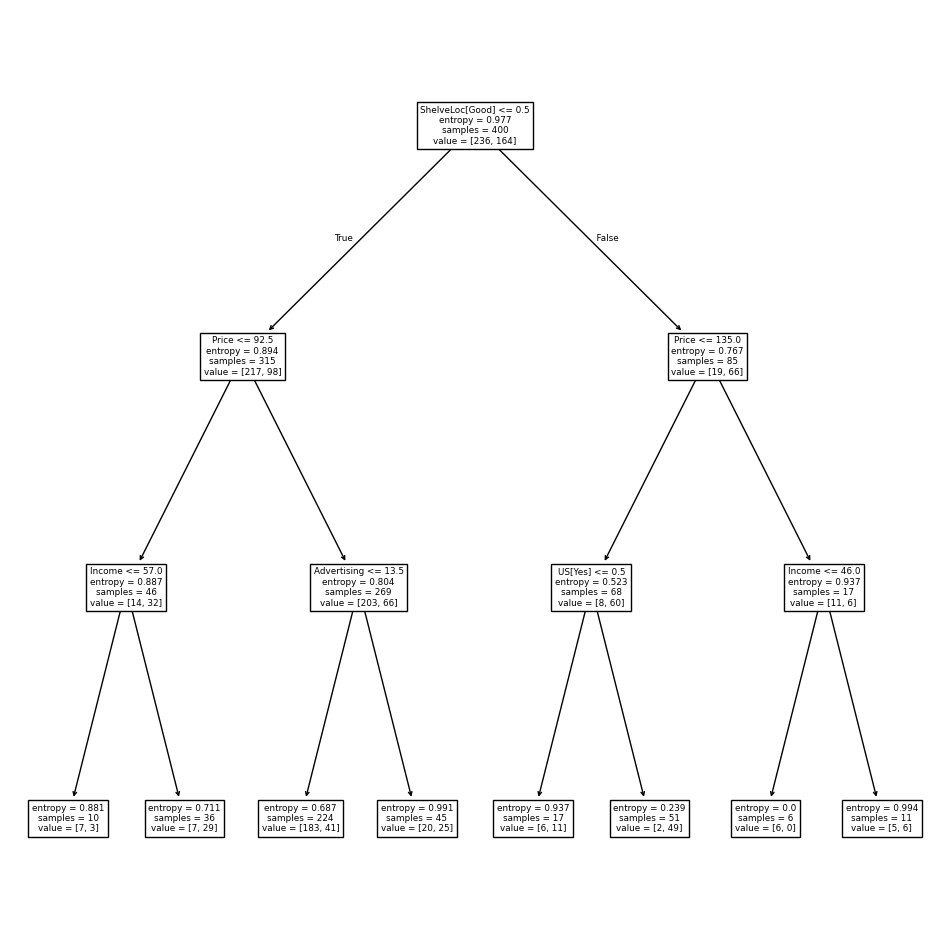

In [46]:
ax = subplots(figsize=(12,12))[1]
plot_tree(clf,
          feature_names=feature_names,
          ax=ax);

ShelveLoc is the most important indicator of Sales.